# NAIVE BAYES

IMPORT LIBRARIES

In [1]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import seaborn as sns

In [2]:
train_dataset = pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\credit_risk_dataset_training.csv")
train_dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
22845,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
22846,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
22847,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
22848,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


FIRST FIVE ROWS

In [3]:
train_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


LAST FIVE ROWS

In [4]:
train_dataset.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
22845,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
22846,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
22847,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
22848,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
22849,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


IDENTIFY MISSING VALUES

In [5]:
train_dataset.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              613
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2147
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
train_dataset.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

STATISTICAL SUMMARY OF TRAIN DATASET

In [7]:
train_dataset.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,22850.000000,2.285000e+04,22237.000000,22850.000000,20703.000000,22850.000000,22850.000000,22850.000000
mean,27.717812,6.604363e+04,4.800018,9595.500000,11.014324,0.220306,0.170243,5.801400
std,6.327822,6.423370e+04,4.112390,6327.603663,3.244035,0.414462,0.106557,4.050767
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.939500e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.780000,30.000000


IDENTIFY OUTLIERS IN AGE COLUMN

In [8]:
train_dataset["person_age"].unique()

array([ 22,  21,  23,  26,  24,  25, 144, 123,  20,  34,  33,  29,  31,
        27,  30,  35,  28,  32,  50,  36,  45,  37,  39,  44,  40,  43,
        41,  46,  38,  42,  47,  48,  49,  58,  51,  53,  61,  54,  66,
        57,  62,  60,  55,  52,  64,  70,  78,  65,  69,  56,  73,  63,
        94,  59,  84,  76], dtype=int64)

VISUALISING THE OUTLIERS

<AxesSubplot:xlabel='loan_status', ylabel='person_age'>

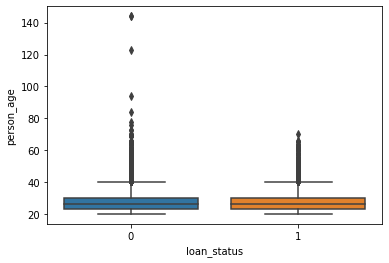

In [9]:
sns.boxplot(x = "loan_status",y = "person_age", data=train_dataset)

EXCLUDING OUTLIERS OF PERSON EMP LENGTH COLUMN

In [10]:
train_dat = train_dataset[train_dataset["person_emp_length"] <100]
train_dat

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
5,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
22845,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
22846,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
22847,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
22848,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [11]:
train_data = train_dat[train_dat["person_age"] <110]
train_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
5,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
22845,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
22846,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
22847,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
22848,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


IMPUTATION REPLACING NULL VALUES WITH MEDIAN IN PERSON EMP LENGTH AND LOAN_INT_RATE COLUMNS

In [12]:
train_data["person_emp_length"] =train_data["person_emp_length"].fillna(train_data["person_emp_length"].median())

C:\Users\kelvin\AppData\Local\Temp\ipykernel_5656\4139231794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["person_emp_length"] =train_data["person_emp_length"].fillna(train_data["person_emp_length"].median())


In [13]:
train_data["loan_int_rate"] =train_data["loan_int_rate"].fillna(train_data["loan_int_rate"].median())

C:\Users\kelvin\AppData\Local\Temp\ipykernel_5656\3880780253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["loan_int_rate"] =train_data["loan_int_rate"].fillna(train_data["loan_int_rate"].median())


ENCODING CATEGORICAL DATA INTO NUMERICS

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le_person_home_ownership  = LabelEncoder()
le_loan_intent  = LabelEncoder()
le_loan_grade = LabelEncoder()
cb_person_default_on_file = LabelEncoder()

In [16]:
train_data["person_home_ownership"] = le_person_home_ownership.fit_transform(train_data["person_home_ownership"])
train_data["loan_intent"] = le_loan_intent.fit_transform(train_data["loan_intent"])
train_data["loan_grade"] = le_loan_grade.fit_transform(train_data["loan_grade"])
train_data["cb_person_default_on_file"] = cb_person_default_on_file.fit_transform(train_data["cb_person_default_on_file"])
train_data.head()

C:\Users\kelvin\AppData\Local\Temp\ipykernel_5656\3517380672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["person_home_ownership"] = le_person_home_ownership.fit_transform(train_data["person_home_ownership"])
C:\Users\kelvin\AppData\Local\Temp\ipykernel_5656\3517380672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["loan_intent"] = le_loan_intent.fit_transform(train_data["loan_intent"])
C:\Users\kelvin\AppData\Local\Temp\ipykernel_5656\3517380672.py:3: SettingWithCopyWarnin

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
3,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2
4,26,77100,3,8.0,1,1,35000,12.42,1,0.45,0,3
5,24,83000,3,8.0,4,0,35000,8.90,1,0.42,0,2


CONFIRMING NULL VALUES

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22233 entries, 1 to 22849
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  22233 non-null  int64  
 1   person_income               22233 non-null  int64  
 2   person_home_ownership       22233 non-null  int32  
 3   person_emp_length           22233 non-null  float64
 4   loan_intent                 22233 non-null  int32  
 5   loan_grade                  22233 non-null  int32  
 6   loan_amnt                   22233 non-null  int64  
 7   loan_int_rate               22233 non-null  float64
 8   loan_status                 22233 non-null  int64  
 9   loan_percent_income         22233 non-null  float64
 10  cb_person_default_on_file   22233 non-null  int32  
 11  cb_person_cred_hist_length  22233 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 1.9 MB


In [18]:
train_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

PREPARING INPUT AND TARGET DATA

In [19]:
intake = train_data.drop(labels ="loan_status",axis = 1)
target =train_data["loan_status"]

NAIVE BAYES GAUSSIN

In [20]:
model = GaussianNB()
model.fit(intake,target)

GaussianNB()

In [21]:
print(model)

GaussianNB()


In [22]:
test_data = pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\credit_risk_dataset_test.csv")
test_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,NaN
1,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,NaN
2,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,0.44,N,4,NaN
3,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,0.32,N,4,NaN
4,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,0.32,N,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9726,52,30000,RENT,6.0,VENTURE,C,5000,12.73,0.17,N,18,NaN
9727,60,49008,OWN,5.0,PERSONAL,C,12000,13.79,0.24,Y,21,NaN
9728,60,45600,RENT,1.0,VENTURE,B,20000,10.00,0.44,N,26,NaN
9729,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0.08,N,20,NaN


DEALING WITH MISSING VALUES IN TEST DATASET

In [23]:
test_data["person_emp_length"] =test_data["person_emp_length"].fillna(test_data["person_emp_length"].median())
test_data["loan_int_rate"] =test_data["loan_int_rate"].fillna(test_data["loan_int_rate"].median())


In [24]:
test_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                    0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                   9731
dtype: int64

In [25]:
test_data["person_home_ownership"] = le_person_home_ownership.fit_transform(test_data["person_home_ownership"])
test_data["loan_intent"] = le_loan_intent.fit_transform(test_data["loan_intent"])
test_data["loan_grade"] = le_loan_grade.fit_transform(test_data["loan_grade"])
test_data["cb_person_default_on_file"] = cb_person_default_on_file.fit_transform(test_data["cb_person_default_on_file"])
test_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,25,9600,0,1.0,3,2,5500,12.87,0.57,0,3,NaN
1,24,54400,3,8.0,3,2,35000,14.27,0.55,1,4,NaN
2,24,78956,3,5.0,3,1,35000,11.11,0.44,0,4,NaN
3,26,108160,3,4.0,1,4,35000,18.39,0.32,0,4,NaN
4,23,92111,3,7.0,3,5,35000,20.25,0.32,0,4,NaN


In [26]:
test_clean= train_data.drop(labels ="loan_status",axis = 1)

In [27]:
expe = target
predi = model.predict(test_clean)

In [28]:
predi

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
print(metrics.classification_report(expe,predi))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     17391
           1       0.65      0.36      0.47      4842

    accuracy                           0.82     22233
   macro avg       0.75      0.65      0.68     22233
weighted avg       0.80      0.82      0.80     22233



In [30]:
from sklearn import metrics

In [31]:
print(metrics.confusion_matrix(expe,predi))

[[16466   925]
 [ 3087  1755]]


ACCURACY SCORE METRICS EVALUATION

In [32]:
print(metrics.accuracy_score(target,predi))

0.8195475194530653


In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

VISUALISATION WITH NAIVE ROC CURVE

In [34]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color= "orange",label = "ROC")
    plt.plot((0,1),(0,1),color = "darkblue", linestyle= "--")
    plt.xlabel("fales Positive rate")
    plt.xlabel("True Positive rate")
    plt.title("Receiving Operating Activities (ROC) curve")
    plt.legend()
    plt.show()

In [35]:
auc = roc_auc_score(target,predi)
print("AUC:%.2f"%auc)

AUC:0.65


In [37]:
import matplotlib.pyplot as plt

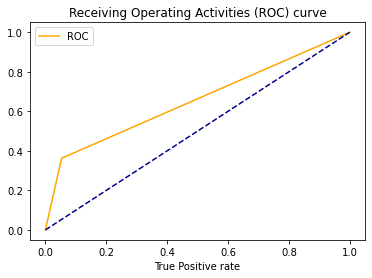

In [40]:
fpr,tpr,thresholds=roc_curve(target,predi)
plot_roc_curve(fpr,tpr)